In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset

In [2]:
df=pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.drop(['agent','company'],axis=1,inplace=True)

In [7]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [8]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)  # Replacing missing value of country  with PRT

In [9]:
df.fillna(0,inplace=True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [12]:
data=df[~filter1]

In [13]:
data[data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [14]:
len(data[data['is_canceled']==0])

75011

In [15]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [16]:
!pip install plotly

You should consider upgrading via the 'C:\Users\jenil_qtevm3y\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
!pip install chart_studio

You should consider upgrading via the 'C:\Users\jenil_qtevm3y\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [19]:
import plotly.express as px

In [20]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no_of_guests'],
              hover_name=country_wise_data['country'],
              title='home country of guests'
             )

In [21]:
map_guest.show()

In [22]:
data2=data[data['is_canceled']==0]

In [23]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

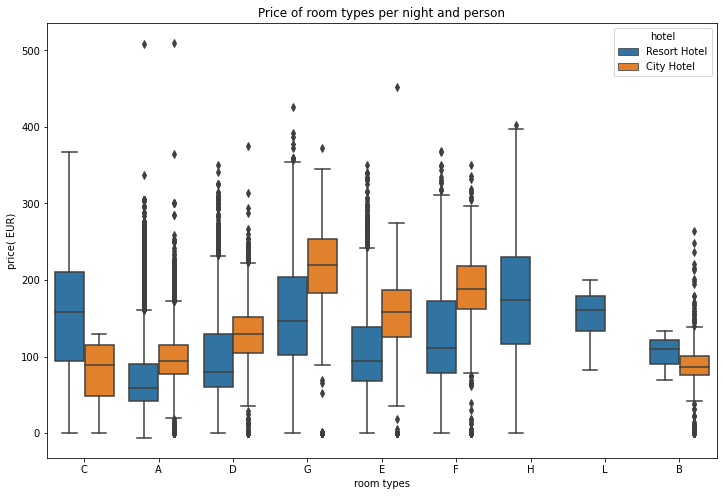

In [24]:

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=data2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

In [25]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [26]:
data_resort_hotel=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city=data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [27]:
rush_resort=data_resort_hotel['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=["arrival_date_month","customers"]
rush_resort

,arrival_date_month,customers
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [28]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=["arrival_date_month","customers"]
rush_city

,arrival_date_month,customers
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [29]:
final_rush=rush_resort.merge(rush_city,on="arrival_date_month")

In [30]:
import sort_dataframeby_monthorweek as sd

In [31]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'arrival_date_month')

In [32]:
final_rush

,arrival_date_month,customers_x,customers_y
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [33]:
px.line(data_frame=final_rush,x='arrival_date_month',y=['customers_x', 'customers_y'])

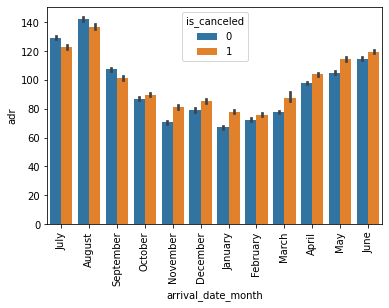

In [34]:
sns.barplot(x='arrival_date_month',y='adr',hue='is_canceled',data=data)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [37]:
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [38]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

C:\Users\jenil_qtevm3y\AppData\Local\Temp\ipykernel_20908\2015990343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [40]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [41]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [42]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')
sorted_data.set_index('arrival_date_month',inplace=True)
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


In [43]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [44]:
categorecal_features=[col for col in data.columns if data[col].dtype=='object']
categorecal_features


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [45]:
data_cat=data[categorecal_features]


In [46]:
numerical_features=[col for col in data.columns if data[col].dtype!='object']
numerical_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [47]:
data.groupby(['hotel']).mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,
City Hotel,0.417859,109.884062,2016.174172,27.175385,15.788234,0.794121,2.180817,1.854882,0.091558,0.004952,0.024974,0.079823,0.132335,0.184013,3.231484,105.503191,0.024342,0.546985
Resort Hotel,0.277674,92.693810,2016.121482,27.139636,15.819437,1.189827,3.128549,1.867755,0.128724,0.013909,0.044398,0.101755,0.146503,0.287562,0.521837,94.983054,0.138088,0.619972


In [48]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [49]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
data_cat['cancellation']=data['is_canceled']

In [51]:
cols=data_cat.columns


In [52]:
cols[0:-1]

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [53]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'cancellation'],
      dtype='object')

In [54]:
for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [55]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,0.0,0.800000,0.0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,0.0,0.800000,0.0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.28402,0.407864,0.0,0.985075,0.0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.28402,0.407864,0.0,0.985075,0.0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.28402,0.407864,0.0,0.522876,0.0


In [56]:
data[numerical_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [57]:
dataframe=pd.concat([data_cat,data[numerical_features]],axis=1)

In [58]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

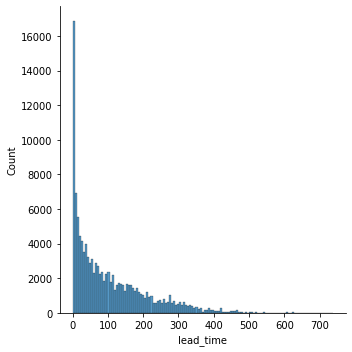

In [59]:
sns.displot(dataframe['lead_time'])

In [60]:
 def handle_outlier(col):
        dataframe[col]=np.log1p(dataframe[col])

<AxesSubplot:xlabel='hotel', ylabel='Density'>

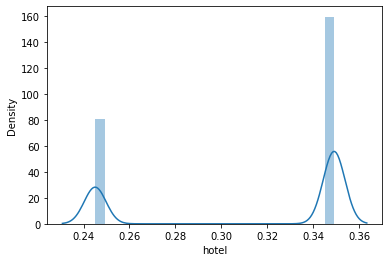

In [61]:
handle_outlier('hotel')
sns.distplot(dataframe['hotel'])


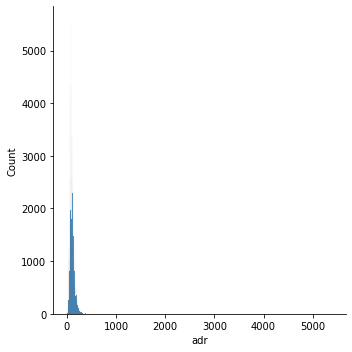

In [62]:
sns.displot(dataframe['adr'])

<AxesSubplot:xlabel='hotel', ylabel='Density'>

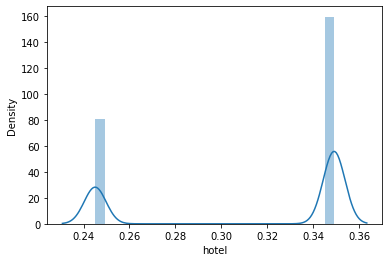

In [63]:
sns.distplot(dataframe['hotel'])

In [64]:
corr_matrix=dataframe.corr()
corr_matrix['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_type                      0.481530
country                           0.357232
lead_time                         0.292876
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
reserved_room_type                0.072769
arrival_date_month                0.069886
adults                            0.058182
days_in_waiting_list              0.054301
meal                              0.050584
adr                               0.046492
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
children                          0.004851
stays_in_weekend_nights          -0.001323
arrival_dat

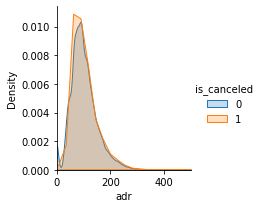

In [65]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'adr',shade=True).add_legend()

In [66]:
features_to_drop=['reservation_status','reservation_status_date','arrival_date_day_of_month','arrival_date_year','stays_in_weekend_nights','arrival_date_year']

In [67]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [68]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  float64
 1   arrival_date_month              119210 non-null  float64
 2   meal                            119210 non-null  float64
 3   country                         119210 non-null  float64
 4   market_segment                  119210 non-null  float64
 5   distribution_channel            119210 non-null  float64
 6   reserved_room_type              119210 non-null  float64
 7   assigned_room_type              119210 non-null  float64
 8   deposit_type                    119210 non-null  float64
 9   customer_type                   119210 non-null  float64
 10  is_canceled                     119210 non-null  int64  
 11  lead_time                       119210 non-null  int64  
 12  arrival_date_wee

In [69]:
x=dataframe.drop('is_canceled',axis=1)

In [70]:
y=dataframe['is_canceled']

In [71]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [72]:
#Lasso(alpha=0.005) 

In [73]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005) )

In [74]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [75]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True])

In [76]:
cols=x.columns

In [77]:
selected_feature=cols[feature_sel_model.get_support()]

In [78]:
selected_feature

Index(['country', 'deposit_type', 'lead_time', 'arrival_date_week_number',
       'stays_in_week_nights', 'adults', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [79]:
x=x[selected_feature]

In [80]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119210, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split


In [82]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [83]:
X_train.shape

(89407, 13)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logreg=LogisticRegression()


In [86]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [87]:
prediction=logreg.predict(X_test)

In [88]:
prediction

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test,prediction)

array([[17348,  1385],
       [ 4944,  6126]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_test,prediction)

0.7876388283058753

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
model1=DecisionTreeClassifier()

In [95]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
pred2=model1.predict(X_test)

In [97]:
confusion_matrix(y_test,pred2)

array([[16089,  2644],
       [ 2573,  8497]], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test,pred2)

0.8249505083380868

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
score=cross_val_score(logreg,x,y,cv=10)

In [102]:
score.mean()

0.7498532002348796

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [104]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive bayes',GaussianNB()))
models.append(('Random forest',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))


In [105]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions,y_test))
    print("Accuracy: ",accuracy_score(predictions,y_test))
    print('\n')
    

LogisticRegression
[[17348  4944]
 [ 1385  6126]]
Accuracy:  0.7876388283058753


Naive bayes
[[12529  2507]
 [ 6204  8563]]
Accuracy:  0.7077139885246452


Random forest
[[17369  2683]
 [ 1364  8387]]
Accuracy:  0.8642083011777338


KNN
[[16036  3974]
 [ 2697  7096]]
Accuracy:  0.7761634734758246


